<a href="https://colab.research.google.com/github/MoizAhmed2517/Deep_Learning_Projects/blob/main/Chest_X_ray_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

# Making a Chest X-ray Pneumonia Classifier

In [2]:
!mkdir ~/.kaggle

In [3]:
!touch ~/.kaggle/kaggle.json

In [4]:
api_token = {"username":"moiza25","key":"9e5dd734f1399997a9a308b1dd8e6339"}

In [5]:
import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --force

 99% 2.28G/2.29G [00:23<00:00, 182MB/s]
100% 2.29G/2.29G [00:23<00:00, 104MB/s]


In [8]:
import zipfile

with zipfile.ZipFile('./chest-xray-pneumonia.zip', 'r') as zip_ref:
  zip_ref.extractall('./data')

In [80]:
import os
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import seaborn as sns

In [15]:
!rm -r /content/data/chest_xray/chest_xray

In [16]:
!rm -r /content/data/chest_xray/__MACOSX

In [19]:
for dirPath, dirName, files in os.walk('./data/chest_xray'):
  print(f"There are {len(dirName)} directories and {len(files)} images in {dirPath}")

There are 3 directories and 0 images in ./data/chest_xray
There are 2 directories and 0 images in ./data/chest_xray/train
There are 0 directories and 3875 images in ./data/chest_xray/train/PNEUMONIA
There are 0 directories and 1341 images in ./data/chest_xray/train/NORMAL
There are 2 directories and 0 images in ./data/chest_xray/val
There are 0 directories and 8 images in ./data/chest_xray/val/PNEUMONIA
There are 0 directories and 8 images in ./data/chest_xray/val/NORMAL
There are 2 directories and 0 images in ./data/chest_xray/test
There are 0 directories and 390 images in ./data/chest_xray/test/PNEUMONIA
There are 0 directories and 234 images in ./data/chest_xray/test/NORMAL


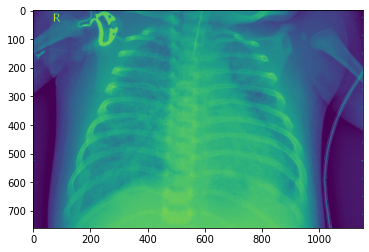

In [21]:
img = mpimg.imread('./data/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
plt.imshow(img)

In [73]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
# img = random.choice(os.listdir(path))
from PIL import Image

def random_image(folder, className):
  placeholder = ''
  if className == 'p':
    placeholder = 'PNEUMONIA'
  elif className == 'n':
    placeholder = 'NORMAL'
  else:
    raise ("Sorry, your value is invalid!")

  path = dir + folder + '/' + placeholder + '/'
  img = random.choice(os.listdir(path))
  img_path = path + img

  plt.imshow(mpimg.imread(img_path))
  plt.axis(False)

  image = Image.open(img_path)
  return image.format, image.size, image.mode

('JPEG', (968, 592), 'L')

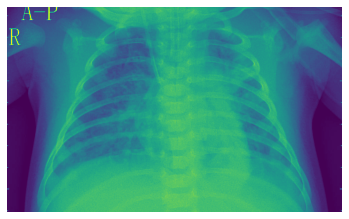

In [79]:
random_image('val', 'p')

In [81]:
for dirPath, dirName, files in os.walk('./data/chest_xray'):
  print(f"There are {len(dirName)} directories and {len(files)} images in {dirPath}")

There are 3 directories and 0 images in ./data/chest_xray
There are 2 directories and 0 images in ./data/chest_xray/train
There are 0 directories and 3875 images in ./data/chest_xray/train/PNEUMONIA
There are 0 directories and 1341 images in ./data/chest_xray/train/NORMAL
There are 2 directories and 0 images in ./data/chest_xray/val
There are 0 directories and 8 images in ./data/chest_xray/val/PNEUMONIA
There are 0 directories and 8 images in ./data/chest_xray/val/NORMAL
There are 2 directories and 0 images in ./data/chest_xray/test
There are 0 directories and 390 images in ./data/chest_xray/test/PNEUMONIA
There are 0 directories and 234 images in ./data/chest_xray/test/NORMAL
